# Runge-Kutta Method for Second and Fourth Order Differential Equations 

This is a simple implementation of the Runge-Kutta method for initial value problems of the second and fourth order. 

### Given an ODE and an initial value, find the time and the Runge Kutta numerical approximation, and then plot the results. 

$$
y\prime = 4y^2 - sin(3y)
$$

for $$ 0 \le t \le 10$$ and $$ y(0) = -5$$

**Approach**:
This method approximates the values of y at a particular time t. It should be noted, however, that 2nd order RK is only applicable to first order ODEs. 

After importing the necessary libraries for our work, the time discretized points with h=0.05 are depicted below.

In [57]:
# Import Needed Libraries
import numpy as np
import math 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 


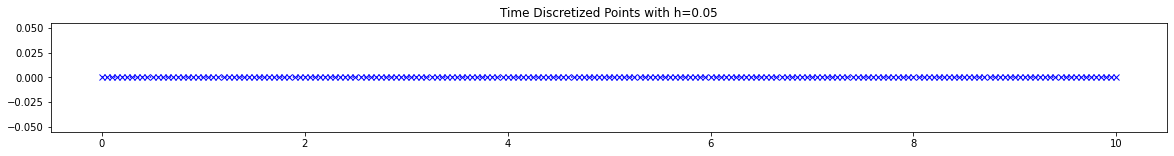

In [58]:
N=200
t_end=10.0
t_start=0.0
h=((t_end-t_start)/N)
t=np.arange(t_start,t_end+h/2,h)
fig = plt.figure(figsize=(20,2))
plt.plot(t,0*t,'x:',color='blue')
plt.title('Time Discretized Points with h=%s'%(h))
plt.show()

## Define the Function

Before going any further, we need to define our function $$f(t,y) = 4y^2 - sin(3y).$$


In [72]:
def myfun(t,y):
    fty=4*y*y-np.sin(3*y*y)
    return fty

## Time Interval Discretization and Initial conditions

The time interval $ 0 \le t \le 10$ is descrtized into $N$ points seperated by a constant stepsize $$ h = \frac{b-a}{N}.$$
In our case, $$ h = \frac{10 - 0}{200} = 0.05.$$
Which gives 101 discrete points: $t_0$ = 0, $t_1$ = 0.05, ..., $t_{200}$=10.
$$ t_i = i 0.05, i = 0, 1, ..., 200.$$

The initial condition: $$ y(0) = y_0 = -5.$$

## 2nd Order Runge Kutta

$$ K_1 = f(t_i,y_i)$$
$$ K_2 = f(t_i+h, y_i+hk_1)$$
$$ y_{i+1} = y_i + \frac{h}{2}(k_1+k_2). $$

In [73]:
y=np.zeros(N+1)
y[0]=-5
## 2nd Order Runge Kutta
for k in range (0,N):
    k1=myfun(t[k],y[k])
    k2=myfun(t[k]+h,y[k]+h*k1)
    y[k+1]=y[k]+h/2*(k1+k2)
    

## Plotting Results

In [74]:
d = {'time i': t[0:10], 
     'R-K':y[0:10]}
df = pd.DataFrame(data=d)
df

,time i,R-K
0,0.00,-5.000000
1,0.05,-2.490296
2,0.10,-1.686015
3,0.15,-1.268394
4,0.20,-1.018856
5,0.25,-0.872626
6,0.30,-0.782608
7,0.35,-0.720248
8,0.40,-0.673243
9,0.45,-0.635753


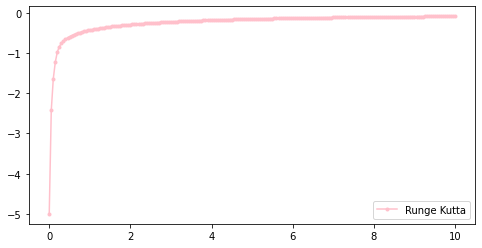

In [75]:
fig = plt.figure(figsize=(8,4))
plt.plot(t,w,'.-',color='pink',label='Runge Kutta')
plt.legend(loc='best')
plt.show()

## 4th Order Runge Kutta

$$ k_1 = f(t,y), $$
$$ k_2 = f(t+\frac{h}{2}, y+\frac{h}{2}k_1),$$
$$ k_3 = f(t+\frac{h}{2}, y+\frac{h}{2}k_2),$$
$$ k_4 = f(t+\frac{h}{2}, y+\frac{h}{2}k_3),$$
$$ y_{i+1}= y_i+\frac{h}{6} (k_1+2k_2+2k_3+k_4).$$

In [76]:
for k in range (0,N):
    k1=myfun(t[k],y[k])
    k2=myfun(t[k]+h/2,y[k]+h/2*k1)
    k3=myfun(t[k]+h/2,y[k]+h/2*k2)
    k4=myfun(t[k]+h,y[k]+h*k3)
    y[k+1]=y[k]+h/6*(k1+2*k2+2*k3+k4)

In [98]:
# Initial Condition
IC= -5
y=np.zeros(N+1)
z=(IC+1)*np.exp(-t)+t-1

In [99]:

import pandas as pd
d = {'time t': t, '4th R-K, y i': y,'Error |y-z|':np.round(np.abs(y-w),5)}
df = pd.DataFrame(data=d)
df

,time t,"4th R-K, y i",Error |y-z|
0,0.00,0.0,5.00000
1,0.05,0.0,2.42621
2,0.10,0.0,1.63787
3,0.15,0.0,1.22305
4,0.20,0.0,0.97167
...,...,...,...
196,9.80,0.0,0.08901
197,9.85,0.0,0.08862
198,9.90,0.0,0.08823
199,9.95,0.0,0.08784


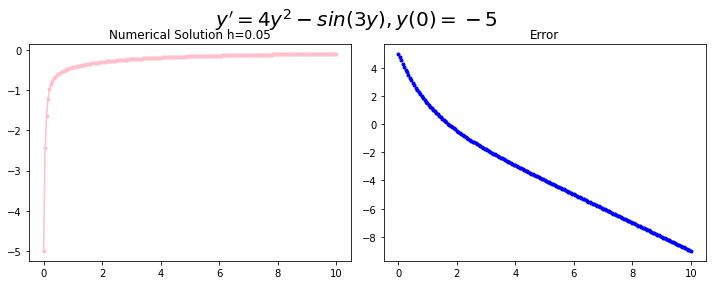

In [103]:
fig = plt.figure(figsize=(10,4))

ax = fig.add_subplot(1,2,1)
plt.plot(t,w, '.-',color='pink')

plt.title('Numerical Solution h=%s'%(h))


ax = fig.add_subplot(1,2,2)
plt.plot(t,y-z, '.',color='blue')
plt.title('Error')

fig.suptitle(r"$y'=4y^2-sin(3y),   y(0)=%s$"%(IC)
             
             , fontsize=20)


plt.tight_layout()
plt.subplots_adjust(top=0.85) 